<a href="https://colab.research.google.com/github/HongTuoiNguyen02/BTVN_Nguyen-Hong-Tuoi_20104071/blob/main/Nguyen_Hong_Tuoi_20104071_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from sklearn.utils import validation
from keras.preprocessing.image import ImageDataGenerator
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
%cd //content/drive/MyDrive/Colab Notebooks/Project/Tomato/

/content/drive/MyDrive/Colab Notebooks/Project/Tomato


In [ ]:
train_data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_set = train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Project/Tomato/Train',target_size=(300,300), batch_size=32, class_mode='categorical')

Found 3936 images belonging to 7 classes.


In [ ]:
test_set = train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Project/Tomato/Test',target_size=(300,300), batch_size=32, class_mode='categorical')

Found 21 images belonging to 7 classes.


In [ ]:
train_set.class_indices

{'Benh bac la som': 0,
 'Benh suong mai': 1,
 'Benh vang la': 2,
 'Dom la': 3,
 'Dom vi khuan': 4,
 'Nhen ve hai dom': 5,
 'Virus kham': 6}

In [ ]:
test_set.class_indices

{'Benh bac la som': 0,
 'Benh suong mai': 1,
 'Benh vang la': 2,
 'Dom la': 3,
 'Dom vi khuan': 4,
 'Nhen ve hai dom': 5,
 'Virus kham': 6}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(300,300,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(300,300,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(300,300,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(7,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 300, 300, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                    

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_set,epochs=100,batch_size=128,verbose=1, validation_data=test_set, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/100
123/123 [==============================] - 2413s 20s/step - loss: 1.9043 - accuracy: 0.4309 - val_loss: 1.0716 - val_accuracy: 0.6190
Epoch 2/100
123/123 [==============================] - 86s 696ms/step - loss: 0.8831 - accuracy: 0.6842 - val_loss: 1.0386 - val_accuracy: 0.5238
Epoch 3/100
123/123 [==============================] - 85s 686ms/step - loss: 0.6967 - accuracy: 0.7477 - val_loss: 1.0592 - val_accuracy: 0.6190
Epoch 4/100
123/123 [==============================] - 86s 697ms/step - loss: 0.6270 - accuracy: 0.7744 - val_loss: 0.6703 - val_accuracy: 0.7619
Epoch 5/100
123/123 [==============================] - 85s 687ms/step - loss: 0.4991 - accuracy: 0.8196 - val_loss: 0.5886 - val_accuracy: 0.7619
Epoch 6/100
123/123 [==============================] - 86s 696ms/step - loss: 0.4566 - accuracy: 0.8402 - val_loss: 0.8622 - val_accuracy: 0.6667
Epoch 7/100
123/123 [==============================] - 86s 695ms/step - loss: 0.4021 - accuracy: 0.8582 - val_loss: 0.6938 -

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Project/Tomato/Tomato.h5')

In [ ]:
model_tomato = load_model('/content/drive/MyDrive/Colab Notebooks/Project/Tomato/Tomato.h5')

In [ ]:
Score=model.evaluate(train_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.01269210409373045
Train Accuracy 0.9964430928230286


<function matplotlib.pyplot.show(*args, **kw)>

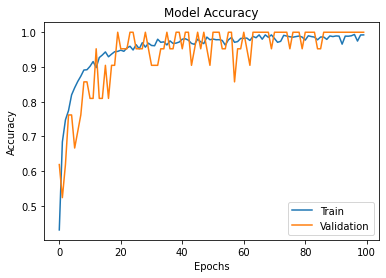

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

1/1 [==============================] - 1s 550ms/step
Nhen_ve_hai_dom


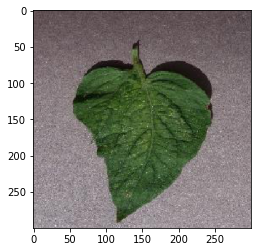

1/1 [==============================] - 0s 17ms/step
Dom_vi_khuan


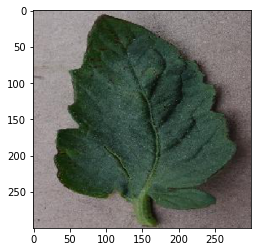

1/1 [==============================] - 0s 19ms/step
Virus_kham


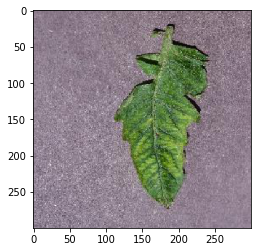

1/1 [==============================] - 0s 15ms/step
Dom_la


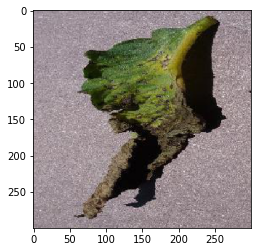

1/1 [==============================] - 0s 16ms/step
Benh_bac_la_som


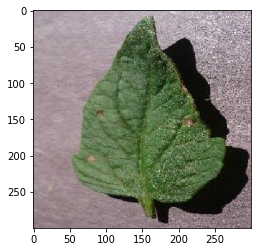

1/1 [==============================] - 0s 15ms/step
Benh_vang_la


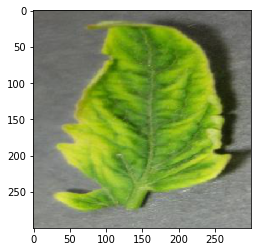

1/1 [==============================] - 0s 15ms/step
Benh_suong_mai


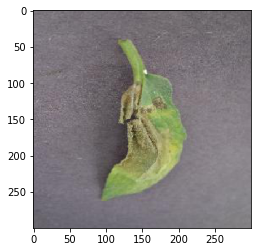

In [ ]:
test='/content/drive/MyDrive/Colab Notebooks/Project/Tomato/Validation'
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(300,300))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_tomato.predict(img)
  if round(result[0][0])==1:
    prediction='Benh_bac_la_som'
  if round(result[0][1])==1:
    prediction = 'Benh_suong_mai'
  if round(result[0][2])==1:
    prediction='Benh_vang_la'
  if round(result[0][3])==1:
    prediction='Dom_la'
  if round(result[0][4])==1:
    prediction='Dom_vi_khuan'
  if round(result[0][5])==1:
    prediction='Nhen_ve_hai_dom'
  if round(result[0][6])==1:
    prediction='Virus_kham'
  print(prediction)
  plt.show()